Mean Squared Error: 31.39 cm²
R² Score: 0.6424


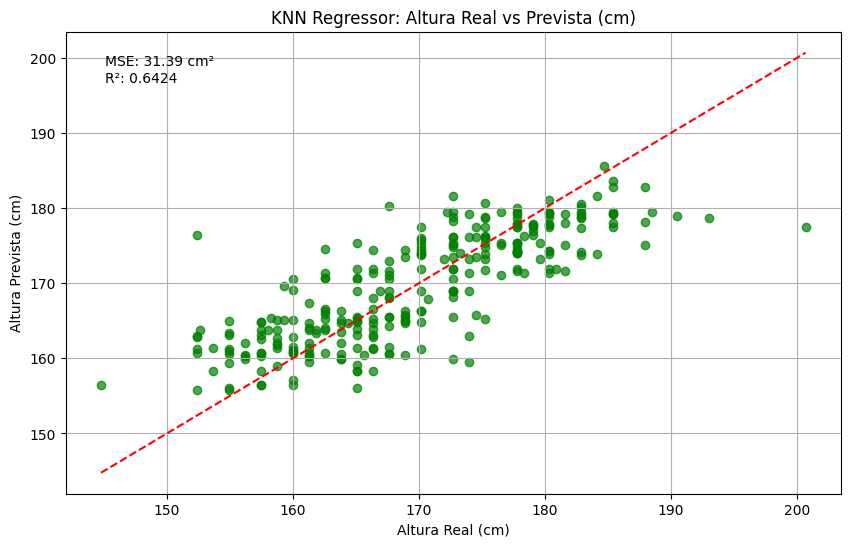


Estatísticas Descritivas (cm):
           father      mother  midparentHeight  childHeight
count  934.000000  934.000000       934.000000   934.000000
mean   175.760657  162.786805       175.785203   169.534666
std      6.290257    5.818851         4.578020     9.091298
min    157.480000  147.320000       163.576000   142.240000
25%    172.720000  160.020000       173.075600   162.560000
50%    175.260000  162.560000       175.889920   168.910000
75%    180.340000  167.322500       178.155600   177.038000
max    199.390000  179.070000       191.592200   200.660000


In [16]:
# NOMES : EMIR BRAZ , SAMADY CORREA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


data = pd.read_csv('/content/sample_data/GaltonFamilies.csv')

# Converter alturas de polegadas para centímetros
height_columns = ['father', 'mother', 'midparentHeight', 'childHeight']
for column in height_columns:
    data[column] = data[column] * 2.54

# Codificar a variável 'gender' (0 = female, 1 = male)
data['gender_encoded'] = LabelEncoder().fit_transform(data['gender'])

# PARAMETROS DO DATESET
X = data[['father', 'mother', 'midparentHeight', 'gender_encoded']].values
y = data['childHeight'].values

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# CALCULO MSE E R
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir resultados
print(f"Mean Squared Error: {mse:.2f} cm²")
print(f"R² Score: {r2:.4f}")

# Função para visualização dos resultados
def plot_knn_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='green')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title("KNN Regressor: Altura Real vs Prevista (cm)")
    plt.xlabel("Altura Real (cm)")
    plt.ylabel("Altura Prevista (cm)")
    plt.grid(True)

    # MSE e R²
    plt.text(0.05, 0.95, f'MSE: {mse:.2f} cm²\nR²: {r2:.4f}',
             transform=plt.gca().transAxes, verticalalignment='top')

    plt.show()


plot_knn_results(y_test, y_pred)


print("\nEstatísticas Descritivas (cm):")
print(data[height_columns].describe())